In [28]:
import pandas as pd
import numpy as np
import math
import requests as rq
import json
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
from dateutil import parser

## Prelminary Cleaning

In [29]:
main_df = pd.read_csv('main_sample.csv')

In [30]:
industry_map = {
    'Manufacture of fabricated metal products, except machinery and equipment': 'fab_metal_manuf',
    'Activities of membership organisations': 'member_activity', 
    'Employment activities': 'employ_activity',
    'Human health activities': 'health_activity',
    'Water collection, treatment and supply': 'water_treatment',
    'Office administrative, office support and other business support activities': 'office_admin',
    'Manufacture of food products': 'food_manuf', 
    'Accommodation': 'accommodation',
    'Other professional, scientific and technical activities': 'other_professional',
    'Crop and animal production, hunting and related service activities': 'animal_product',
    'Legal and accounting activities': 'legal_accounting',
    'Insurance, reinsurance and pension funding, except compulsory social security': 'insurance',
    'Public administration and defence; compulsory social security': 'public_service',
    'Information service activities': 'info_tech',
    'Wholesale and retail trade and repair of motor vehicles and motorcycles': 'vehicle_services',
    'Residential care activities': 'resident_care',
    'Libraries, archives, museums and other cultural activities': 'cultural_services',
    'Travel agency, tour operator and other reservation service and related activities': 'travel_services',
    'Education': 'education',
    'Retail trade, except of motor vehicles and motorcycles': 'retail',
    'Architectural and engineering activities; technical testing and analysis': 'architect_engineer',
    'Computer programming, consultancy and related activities': 'computer_programming',
    'Real estate activities': 'real_estate',
    'Financial service activities, except insurance and pension funding': 'financial_services',
    'Social work activities without accommodation': 'social_work',
    'Food and beverage service activities': 'food_service',
    'Construction of buildings': 'building_construction',
    'Activities of head offices; management consultancy activities': 'management',
    'Advertising and market research': 'advertising',
    'Sports activities and amusement and recreation activities': 'sports_recreation',
    'Warehousing and support activities for transportation': 'warehousing_transport',
    'Manufacture of other non-metallic mineral products': 'mineral_manuf',
    'Rental and leasing activities': 'rental_activity',
    'Specialised construction activities': 'special_construction', 
    'Publishing activities': 'publishing',
    'Wholesale trade, except of motor vehicles and motorcycles': 'wholesale_trade',
    'Manufacture of computer, electronic and optical products': 'electronic_manuf',
    'Services to buildings and landscape activities': 'building_services',
    'Other personal service activities': 'other_services',
    'Postal and courier activities': 'postal',
    'Electricity, gas, steam and air conditioning supply': 'utilities_supply',
    'Security and investigation activities': 'security',
    'Waste collection, treatment and disposal activities; materials recovery': 'waste_management',
    'Undifferentiated goods- and services-producing activities of private households for own use': 'consumer_goods',
    'Manufacture of chemicals and chemical products': 'chemical_manuf',
    'Manufacture of textiles': 'textile_manuf',
    'Activities auxiliary to financial services and insurance activities': 'financial_related',
    'Civil engineering': 'civil_engineer', 
    'Telecommunications': 'telecom',
    'Manufacture of electrical equipment': 'elec_equip_manuf',
    'Repair of computers and personal and household goods': 'goods_repair',
    'Manufacture of basic pharmaceutical products and pharmaceutical preparations': 'pharma_manuf',
    'Remediation activities and other waste management services': 'waste_remediation',
    'Repair and installation of machinery and equipment': 'installation',
    'Manufacture of machinery and equipment nec': 'machine_manuf',
    'Manufacture of leather and related products': 'leather_manuf',
    'Scientific research and development': 'science_rd', 
    'Forestry and logging': 'forestry',
    'Other manufacturing': 'other_manuf', 
    'Manufacture of other transport equipment': 'transport_manuf',
    'Programming and broadcasting activities': 'broadcasting', 
    'Air transport': 'air_transport',
    'Motion picture, video and television programme production, sound recording and music publishing activities': 'media_production',
    'Creative, arts and entertainment activities': 'entertainment_activity',
    'Extraction of crude petroleum and natural gas': 'oil_gas_manuf',
    'Manufacture of beverages': 'beverage_manuf',
    'Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials': 'wood_manuf',
    'Manufacture of motor vehicles, trailers and semi-trailers': 'vehicle_manuf',
    'Manufacture of furniture': 'furniture_manuf',
    'Land transport and transport via pipelines': 'pipe_transport',
    'Activities of households as employers of domestic personnel': 'domestic',
    'Printing and reproduction of recorded media': 'media_reproduction',
    'Manufacture of wearing apparel': 'clothes_manuf', 
    'Veterinary activities': 'veterinary_activity',
    'Activities of extraterritorial organisations and bodies': 'foreign_service',
    'Other mining and quarrying': 'other_mining', 
    'Water transport': 'water_transport',
    'Manufacture of basic metals': 'basic_metal_manuf', 
    'Gambling and betting activities': 'gambling',
    'Mining of coal and lignite': 'coal_mining', 
    'Fishing and aquaculture': 'fishing',
    'Manufacture of paper and paper products': 'paper_manuf',
    'Manufacture of rubber and plastic products': 'plastic_manuf',
    'Mining support service activities': 'mining_services',
    'Manufacture of coke and refined petroleum products': 'petrol_manuf',
    'Sewerage': 'sewerage',
    'Mining of metal ores': 'metal_mining',
    'nan': ''
}

main_df['INDUSTRY'] = main_df['INDUSTRY'].map(lambda x: '' if pd.isna(x) else industry_map[x])

## API Mapping

In [31]:
green_df = pd.read_csv('greens.csv')

code_map = {}

for code in green_df['O*NET-SOC Code']:

    res = rq.get(f'http://api.lmiforall.org.uk/api/v1/o-net/onet2soc?onetCodes={code}')
    js = json.loads(res.content)
    
    if len(js) > 0: code_map[code] = code_map[code] = [x['soc'] for x in js[0]['socCodes']]

In [32]:
green_soc = np.unique([item for sublist in code_map.values() for item in sublist])

In [33]:
print(green_soc[0:5])
print(f"There are {len(green_soc)} green jobs mapped in SOC")

[1121 1122 1123 1132 1150]
There are 109 green jobs mapped in SOC


## Label Green Occupations

In [34]:
main_df['green'] = main_df['SOC_4'].map(lambda x: x in green_soc)

In [35]:
print(f"{(len(main_df[main_df['green']]) / len(main_df)):.2%} of jobs are green")

33.33% of jobs are green


## High-Level Green EDA

### Headline Findings

The “greening” of occupations refers to the extent to which green economy activities and technologies increase the demand for existing occupations, shape the work and worker requirements needed for occupational performance, or generate unique work and worker requirement - [ONET](https://www.onetcenter.org/dl_files/Green.pdf)

1. There's no clear trend in demand for green occupations in the UK
2. Manufacturing industries have the most green occupations
3. Mechanical Engineering is the most "green" skill
4. Missing salary data is heterogenous across industries

### Green Occupations Over Time

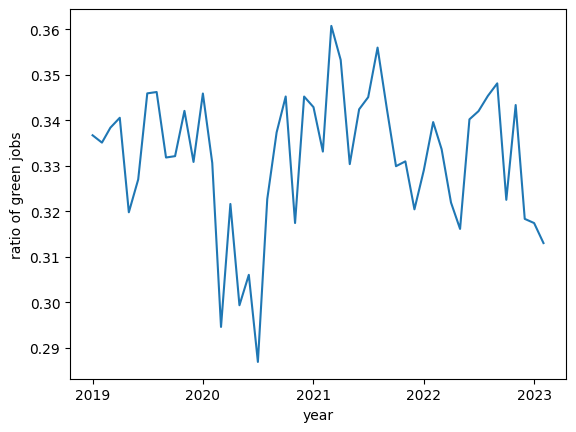

In [36]:
main_df['month'] = main_df['POSTED'].map(lambda x: parser.parse(x).date().replace(day=1))
time_df = main_df[['month', 'green']].groupby('month').agg({'green': 'sum'}).sort_values('month')
total_df = main_df[['month', 'ID']].groupby('month').agg({'ID': 'count'}).sort_values('month')

rough = np.divide(time_df['green'], total_df['ID'])
smooth = rough.copy()

fig, axes = plt.subplots(1,1)
axes.plot(time_df.index, smooth)
axes.set_ylabel('ratio of green jobs')
axes.set_xlabel('year')
axes.xaxis.set_major_locator(YearLocator())
plt.show()

### Skills Associated with Green Jobs

In [40]:
green_job_df = main_df[main_df['green']].copy()

In [41]:
def explodeList(df, measure, group, specify):

    df = df[[group, measure]].copy()
    df = df[df[group] == specify]

    df['value'] = df[measure].map(lambda x: '' if x is None else [y.strip() for y in x.replace('"', '').replace(",","").split('\n')[1:-1]])
    df['data_type'] = [measure for i in range(len(df))]

    return df[[group, 'data_type', 'value']].explode('value')

df = pd.DataFrame(columns=["green", 'data_type', 'value'])

for i in [True, False]: 

    common = explodeList(main_df, 'COMMON_SKILLS_NAME', 'green', i)
    special = explodeList(main_df, 'SPECIALIZED_SKILLS_NAME', 'green', i)
    software = explodeList(main_df, 'SOFTWARE_SKILLS_NAME', 'green', i)
    certification = explodeList(main_df, 'CERTIFICATIONS_NAME', 'green', i)

    df = pd.concat([df, common])
    df = pd.concat([df, special])
    df = pd.concat([df, software])
    df = pd.concat([df, certification])

green_skills_df = df

/var/folders/c5/1ykwfx953hdd7lps3nkt7myr0000gn/T/ipykernel_5374/459577291.py:21: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, special])
/var/folders/c5/1ykwfx953hdd7lps3nkt7myr0000gn/T/ipykernel_5374/459577291.py:22: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, software])
/var/folders/c5/1ykwfx953hdd7lps3nkt7myr0000gn/T/ipykernel_5374/459577291.py:23: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, certification])
/var/folders/c5/1ykwfx953hdd7lps3nkt7myr0000gn/T/ipykernel_5374/459577291.py:20: FutureWarning: In a future version, object-dtype colum

In [42]:
def green_skills(type, min):

        ratios = []
        skills = []
        df1 = green_skills_df[green_skills_df['data_type'] == type]

        for i in green_skills_df['value'].unique(): 

                df2 = df1[df1['value'] == i]

                if len(df2) > min:
                        skills.append(i)
                        ratios.append(len(df2[df2['green']]) / len(df2))
                        
        list1, list2 = zip(*sorted(zip(ratios, skills)))

        plt.bar(list2, height = list1)
        plt.tick_params(
                axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
        plt.xlabel('skills')
        plt.ylabel('association with green jobs')
        plt.show()

        print('The Most Green Skills: ')

        for i in range((len(list1) - 10),len(list1)):
                print(f'{list1[i]:.2%} of jobs requiring {list2[i]} are green')

        return pd.DataFrame({'skill': list2, 'ratio': list1})

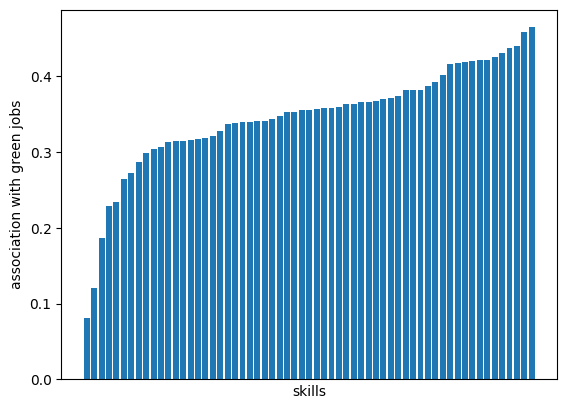

The Most Green Skills: 
41.94% of jobs requiring Consulting are green
41.98% of jobs requiring Analytical Skills are green
42.12% of jobs requiring Problem Solving are green
42.16% of jobs requiring Coordinating are green
42.52% of jobs requiring Troubleshooting (Problem Solving) are green
43.05% of jobs requiring Quality Assurance are green
43.70% of jobs requiring Scheduling are green
44.06% of jobs requiring Influencing Skills are green
45.85% of jobs requiring Investigation are green
46.46% of jobs requiring Operations are green


In [43]:
common_df = green_skills('COMMON_SKILLS_NAME', round(len(main_df) / 100))

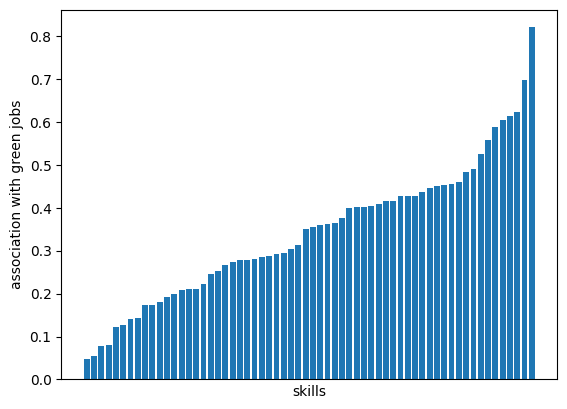

The Most Green Skills: 
48.45% of jobs requiring Project Management are green
48.94% of jobs requiring Purchasing are green
52.61% of jobs requiring New Product Development are green
55.92% of jobs requiring Supply Chain are green
58.95% of jobs requiring Sales Management are green
60.39% of jobs requiring Operations Management are green
61.53% of jobs requiring Construction are green
62.39% of jobs requiring Warehousing are green
69.80% of jobs requiring Machinery are green
82.05% of jobs requiring Mechanical Engineering are green


In [44]:
specialized_df = green_skills('SPECIALIZED_SKILLS_NAME', round(len(main_df) / 100))

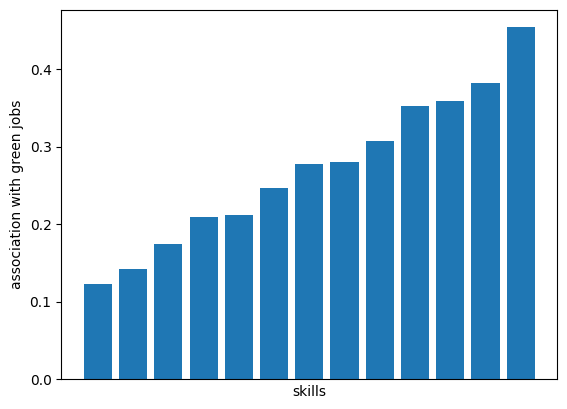

The Most Green Skills: 
20.98% of jobs requiring Application Programming Interface (API) are green
21.18% of jobs requiring SQL (Programming Language) are green
24.65% of jobs requiring Amazon Web Services are green
27.78% of jobs requiring Microsoft Azure are green
28.02% of jobs requiring Python (Programming Language) are green
30.68% of jobs requiring Microsoft Outlook are green
35.27% of jobs requiring Microsoft Excel are green
35.84% of jobs requiring Microsoft Office are green
38.23% of jobs requiring Microsoft PowerPoint are green
45.36% of jobs requiring SAP Applications are green


In [45]:
software_df = green_skills('SOFTWARE_SKILLS_NAME', round(len(main_df) / 100))

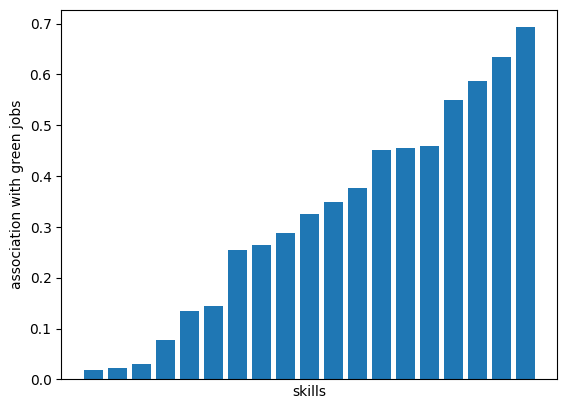

The Most Green Skills: 
32.61% of jobs requiring ITIL Certifications are green
35.00% of jobs requiring PRINCE2  (PRojects IN Controlled Environments 2) are green
37.61% of jobs requiring Project Management Professional Certification are green
45.13% of jobs requiring Chartered Financial Analyst are green
45.44% of jobs requiring Security Clearance are green
45.89% of jobs requiring Master Of Business Administration (MBA) are green
55.04% of jobs requiring Cisco Certified Network Associate are green
58.62% of jobs requiring Certified International Property Specialist are green
63.53% of jobs requiring Chartered Institute Of Personnel And Development (CIPD) Certified are green
69.25% of jobs requiring CSCS Card are green


In [46]:
certification_df = green_skills('CERTIFICATIONS_NAME', round(len(main_df) / 1000))

## Salary EDA

/Users/matthewbone/Documents/Coding/VSCode/datathonPP/ppEnv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/matthewbone/Documents/Coding/VSCode/datathonPP/ppEnv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/matthewbone/Documents/Coding/VSCode/datathonPP/ppEnv/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


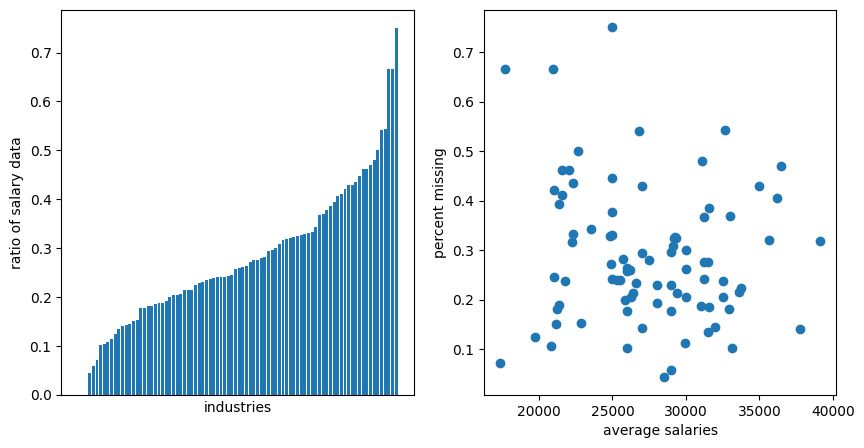

In [47]:
ratios = []
salaries = []

for i in industry_map.values(): 

    df = main_df[main_df['INDUSTRY'] == i]

    salaries.append(df['AVG_ANNUAL_SALARY'].median())
    ratios.append(len(df[df['AVG_ANNUAL_SALARY'].map(lambda x: not math.isnan(x))]) / len(df))

list1, list2 = zip(*sorted(zip(ratios, list(industry_map.values()))))

fig, axes = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

axes[0].bar(list2, height = list1)
axes[0].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
axes[0].set_xlabel('industries')
axes[0].set_ylabel('ratio of salary data')

axes[1].scatter(salaries, ratios)
axes[1].set_xlabel('average salaries')
axes[1].set_ylabel('percent missing')
plt.show()

In [48]:
print('Industries with the highest ratio of salaries posted: ')

for i in range((len(list1) - 10),len(list1)):
    print(f'{list2[i]} has {list1[i]:.2%} salaries posted')

Industries with the highest ratio of salaries posted: 
goods_repair has 46.15% salaries posted
resident_care has 46.17% salaries posted
basic_metal_manuf has 47.06% salaries posted
education has 48.00% salaries posted
domestic has 50.00% salaries posted
public_service has 54.11% salaries posted
health_activity has 54.28% salaries posted
fishing has 66.67% salaries posted
leather_manuf has 66.67% salaries posted
sewerage has 75.00% salaries posted


In [49]:
print('Industries with the lowest ratio of salaries posted: ')

for i in range(10):
    print(f'{list2[i]} has {list1[i]:.2%} salaries posted')

Industries with the lowest ratio of salaries posted: 
coal_mining has 0.00% salaries posted
metal_mining has 0.00% salaries posted
petrol_manuf has 0.00% salaries posted
pharma_manuf has 4.35% salaries posted
foreign_service has 5.88% salaries posted
other_mining has 7.14% salaries posted
oil_gas_manuf has 10.23% salaries posted
electronic_manuf has 10.34% salaries posted
clothes_manuf has 10.71% salaries posted
legal_accounting has 11.32% salaries posted


# Stakeholder Mapping

### 1. Job Growth Rates

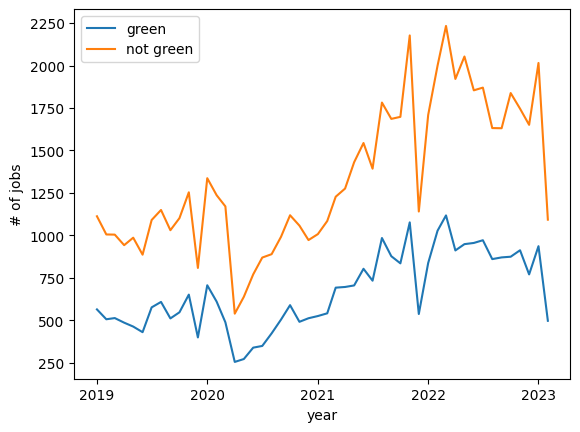

In [129]:
green_df = main_df[main_df['green']].sort_values('month').groupby('month').agg({'ID': 'count'})
not_df = main_df[~main_df['green']].sort_values('month').groupby('month').agg({'ID': 'count'})

fig, axes = plt.subplots(1,1)
axes.plot(green_df.index, green_df['ID'], label='green')
axes.plot(not_df.index, not_df['ID'], label='not green')
axes.set_xlabel('year')
axes.xaxis.set_major_locator(YearLocator())
axes.legend()
axes.set_ylabel('# of jobs')
plt.show()

### 2. Green vs Not Green

<BarContainer object of 2 artists>

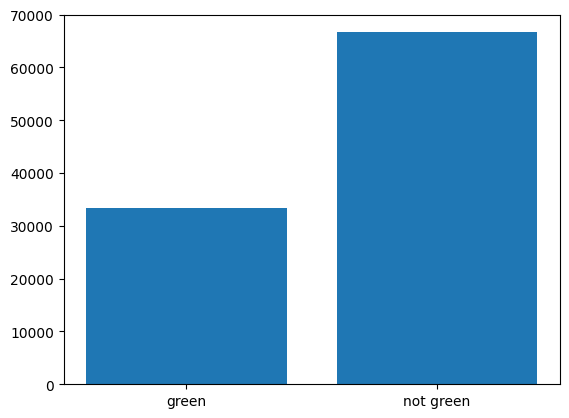

In [130]:
plt.bar(['green', 'not green'], height = [len(main_df[main_df['green']]), len(main_df[~main_df['green']])])

### 3. Top Green Skills

In [131]:
skills_df = pd.read_csv('skills_sample.csv')
skills_df['month'] = skills_df['POSTED'].map(lambda x: parser.parse(x).date().replace(day=1))

In [132]:
top_specialized_skills = [
    'Machinery',
    'Mechanical Engineering',
    'Maintenance Engineering',
    'Electrical Engineering',
    'Warehousing',
]

In [133]:
top_df = skills_df[skills_df['SKILL_NAME'].map(lambda x: x in top_specialized_skills)]

trends = {i:[] for i in top_specialized_skills}
months = main_df['month'].sort_values().unique()

for month in months:

    total = len(main_df[main_df['month'] == month])

    for skill in top_specialized_skills:

        temp_df = top_df[top_df['SKILL_NAME'] == skill]
        temp_df = temp_df[temp_df['month'] == month]

        trends[skill].append(len(temp_df) / total)


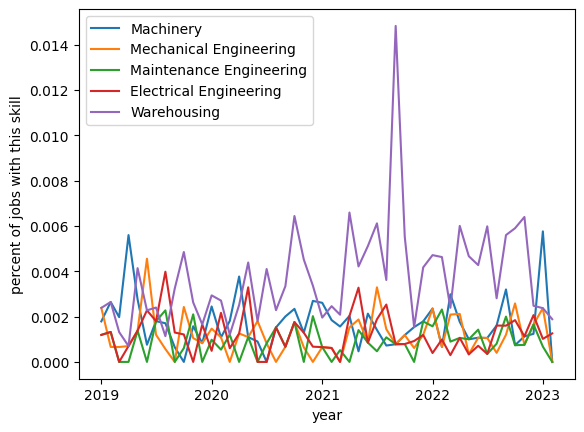

In [134]:
fig, axes = plt.subplots(1,1)

for key, val in trends.items():

    axes.plot(months, val, label=key)


axes.set_xlabel('year')
axes.xaxis.set_major_locator(YearLocator())
axes.legend()
axes.set_ylabel('percent of jobs with this skill')
plt.show()

### 4. Green Occupations by Industry

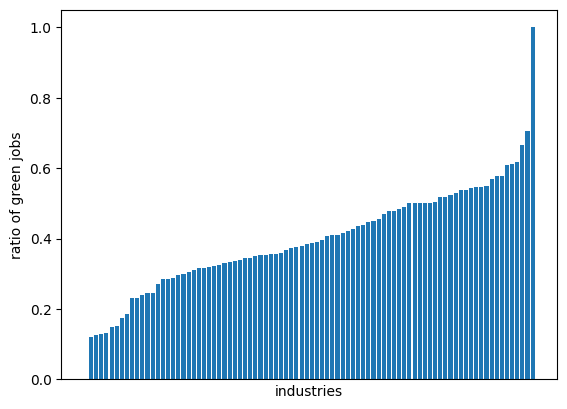

In [135]:
ratios = []
salaries = []

for i in industry_map.values(): 

    df = main_df[main_df['INDUSTRY'] == i]

    ratios.append(len(df[df['green']]) / len(df))

list1, list2 = zip(*sorted(zip(ratios, list(industry_map.values()))))

plt.bar(list2, height = list1)
plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
plt.xlabel('industries')
plt.ylabel('ratio of green jobs')
plt.show()

In [136]:
print('Industries with the least green jobs: ')

for i in range(10):
    print(f'{list2[i]} has {list1[i]:.2%} green jobs')

Industries with the least green jobs: 
coal_mining has 0.00% green jobs
resident_care has 12.05% green jobs
veterinary_activity has 12.68% green jobs
health_activity has 13.02% green jobs
food_service has 13.17% green jobs
accommodation has 14.95% green jobs
social_work has 15.06% green jobs
sports_recreation has 17.55% green jobs
security has 18.72% green jobs
building_services has 23.06% green jobs


In [137]:
print('Industries with the most green jobs: ')

for i in range((len(list1) - 10),len(list1)):
    print(f'{list2[i]} has {list1[i]:.2%} green jobs')

Industries with the most green jobs: 
civil_engineer has 55.03% green jobs
electronic_manuf has 56.90% green jobs
waste_management has 57.66% green jobs
mining_services has 57.69% green jobs
elec_equip_manuf has 60.98% green jobs
machine_manuf has 61.32% green jobs
chemical_manuf has 61.87% green jobs
leather_manuf has 66.67% green jobs
basic_metal_manuf has 70.59% green jobs
metal_mining has 100.00% green jobs


### 5. Green Skills by City

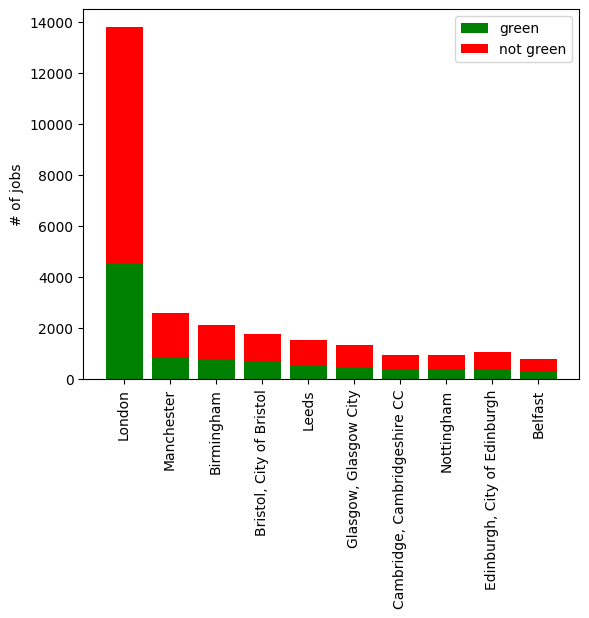

In [184]:
green_df = main_df[main_df['green']]
not_df = main_df[~main_df['green']]

green_cities = green_df['CITY_NAME'].value_counts()
not_cities = {key:val for key, val in not_df['CITY_NAME'].value_counts().items()}

plt.bar(green_cities.index[1:11], green_cities.values[1:11], label='green', color='green')
plt.bar(green_cities.index[1:11], [not_cities[i] for i in green_cities.index[1:11]], bottom=green_cities.values[1:11], label='not green', color='red')
plt.ylabel('# of jobs')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### 6. Education Levels

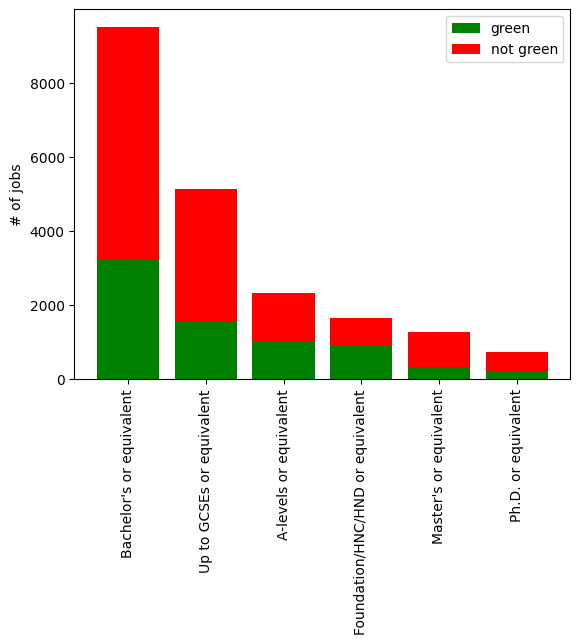

In [185]:
green_edu = green_df['EDULEVELS_NAME_MIN'].value_counts()
not_edu = {key:val for key, val in not_df['EDULEVELS_NAME_MIN'].value_counts().items()}

plt.bar(green_edu.index[0:6], green_edu.values[0:6], label='green', color='green')
plt.bar(green_edu.index[0:6], [not_edu[i] for i in green_edu.index[0:6]], bottom=green_edu.values[0:6], label='not green', color='red')
plt.ylabel('# of jobs')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### 7. Green Certifications

In [187]:
green_certs = [
    'CSCS Card',
    'Security Clearance',
    'Functional Skills Qualification',
    'Core Domestic Gas Safety (CCN1)',
    'Forklift Certification'
]

cert_counts = [
    4528,
    623,
    588,
    328,
    221
]

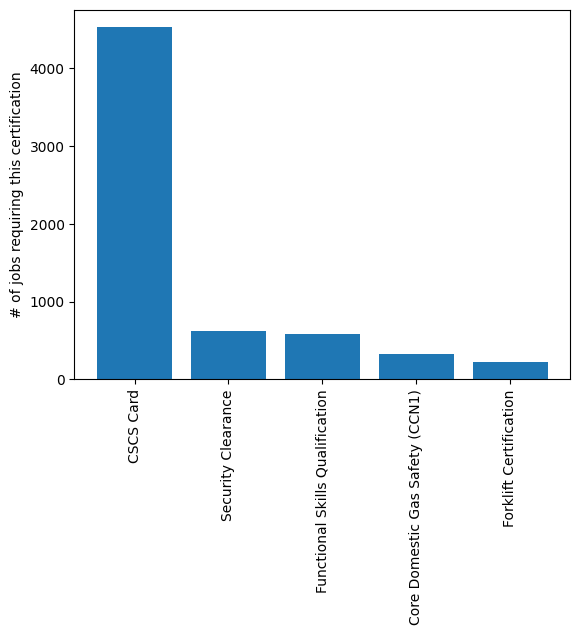

In [191]:
plt.bar(green_certs, cert_counts)
plt.ylabel('# of jobs requiring this certification')
plt.xticks(rotation = 90)
plt.show()

### 8. Green Companies

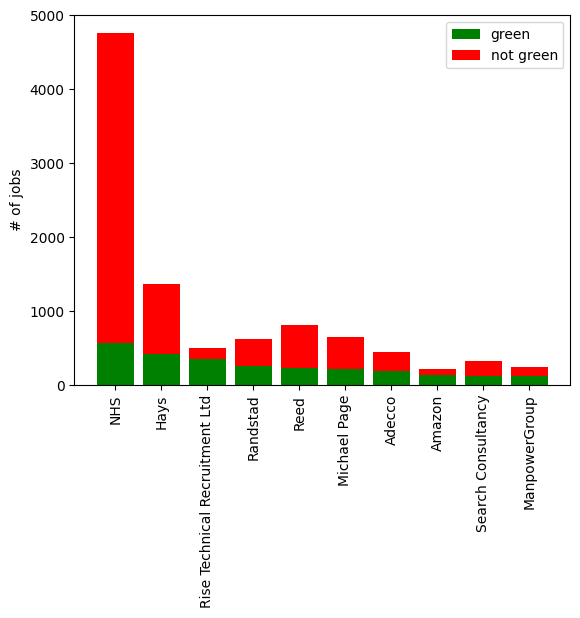

In [195]:
green_comp = green_df['COMPANY_NAME'].value_counts()
not_comp = {key:val for key, val in not_df['COMPANY_NAME'].value_counts().items()}

plt.bar(green_comp.index[1:11], green_comp.values[1:11], label='green', color='green')
plt.bar(green_comp.index[1:11], [not_comp[i] for i in green_comp.index[1:11]], bottom=green_comp.values[1:11], label='not green', color='red')
plt.ylabel('# of jobs')
plt.xticks(rotation = 90)
plt.legend()
plt.show()